In [ ]:
#IF WORKING WITH COLAB UNCOMMENT THE LINES BELOW


# from google.colab import drive
# from google.colab import files
# drive.mount("/content/gdrive")

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import LearningRateScheduler


In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data() 

In [3]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

In [4]:
num_classes=10

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

train_images=train_images.astype("float32")  
test_images=test_images.astype("float32")

train_images /= 255.0
test_images /= 255.0

In [5]:
#first convolution
model=Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [6]:
#2nd convolution layer
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


In [7]:
#3rd convolution layer
model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


In [8]:
#flatten layer
model.add(Flatten())
model.add(Dense(32, activation='relu'))

In [9]:
n_timesteps=32
model.add(RepeatVector(n_timesteps))


In [10]:
#1st lstm layer
model.add(SimpleRNN(128, return_sequences=True, input_shape=(n_timesteps,3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


In [11]:
#2nd lstm layer
model.add(SimpleRNN(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

In [12]:
#output layer
model.add(Dense(num_classes,activation='softmax'))

#model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [13]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1, write_graph=True,write_images=True)

In [14]:
#training
batch_size = 32
epochs=10

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 507s 324ms/step - loss: 1.9927 - accuracy: 0.2203 - val_loss: 1.7257 - val_accuracy: 0.3357
Epoch 2/10
1563/1563 [==============================] - 487s 311ms/step - loss: 1.6987 - accuracy: 0.3554 - val_loss: 1.5277 - val_accuracy: 0.4248
Epoch 3/10
1563/1563 [==============================] - 498s 318ms/step - loss: 1.5136 - accuracy: 0.4395 - val_loss: 1.3596 - val_accuracy: 0.5032
Epoch 4/10
1563/1563 [==============================] - 509s 326ms/step - loss: 1.4151 - accuracy: 0.4887 - val_loss: 1.3213 - val_accuracy: 0.5265
Epoch 5/10
1563/1563 [==============================] - 473s 303ms/step - loss: 1.3326 - accuracy: 0.5217 - val_loss: 1.2811 - val_accuracy: 0.5508
Epoch 6/10
1563/1563 [==============================] - 439s 281ms/step - loss: 1.2986 - accuracy: 0.5390 - val_loss: 1.1635 - val_accuracy: 0.5833
Epoch 7/10
1563/1563 [==============================] - 450s 288ms/step - loss: 1.2413 - accuracy: 0.5622 - val_

In [15]:
scores = model.evaluate(test_images,test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 25s 81ms/step - loss: 1.1622 - accuracy: 0.5980
Test loss: 1.162222981452942
Test accuracy: 0.5979999899864197


In [16]:
# get predictions on the test set
y_hat = model.predict(test_images)

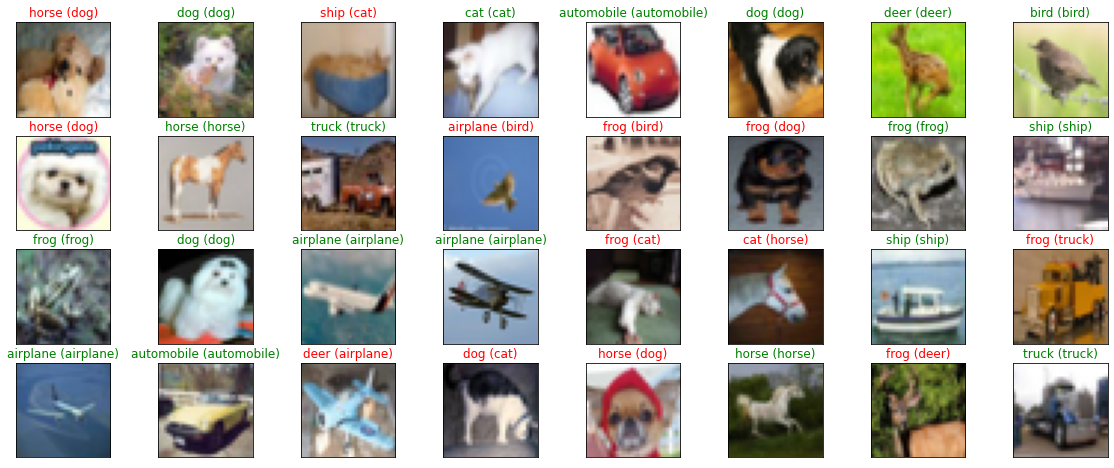

In [17]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))